Ekstraklasa 2025 - 2025.11.07

In [12]:
import statistics

In [13]:
import pandas as pd

In [14]:
from helpers import *
from regression import *

In [15]:
ELO_DATE = '2025-11-07'

In [16]:
# download_elo_data(ELO_DATE)

In [17]:
# api_get_leagues()

In [18]:
# find_league_id('GB-ENG', 'Premier League')

# Premier League: 39
# Brazil Serie A: 71
# Ekstraklasa: 106

In [19]:
# df = get_api_teams_and_elo_from_clubelo(ELO_DATE, 'ENG')
# df.head(20)

In [20]:
# elo_drift_df = pd.merge(df, df2, how='inner', on='Club', suffixes=('_before', '_after'))
# elo_drift_df['Elo_Drift'] = elo_drift_df['Elo_after'] - elo_drift_df['Elo_before']
# season_stdev = statistics.stdev(elo_drift_df['Elo_Drift'])
# print(season_stdev)
# elo_drift_df.head(20)

In [21]:
main_regression("POL", 1)

Unmatched Opta teams:
                 Team  Rating  Country Country_Code
26           Flamengo    85.7   Brazil           BR
29          Palmeiras    84.9   Brazil           BR
44           Cruzeiro    81.4   Brazil           BR
46           Mirassol    80.8   Brazil           BR
47           Botafogo    80.8   Brazil           BR
50         Fluminense    80.1   Brazil           BR
56        Corinthians    79.6   Brazil           BR
60      Vasco da Gama    79.0   Brazil           BR
68          Sao Paulo    78.4   Brazil           BR
69              Bahia    78.4   Brazil           BR
75   Atletico Mineiro    77.9   Brazil           BR
78      Internacional    77.5   Brazil           BR
85             Gremio    77.0   Brazil           BR
87   Stockport County    76.6  England          ENG
93              Ceara    75.8   Brazil           BR
96             Santos    75.5   Brazil           BR
100          Vitioria    75.1   Brazil           BR
101     RB Bragantino    75.0   Brazil    

In [22]:
standings_df = build_historical_standings_table_after_at_most_n_rounds(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE)
standings_df.head(20)

,Club,Elo,Points,Games played
1,Gornik Zabrze,1545.04,29,14
2,Wisla Plock,1476.22,25,13
3,Jagiellonia,1560.58,24,13
4,Cracovia Krakow,1513.96,22,13
5,Lech Poznan,1551.70,21,13
6,Raków Częstochowa,1580.55,20,13
7,Korona Kielce,1485.10,20,14
8,Radomiak Radom,1454.03,19,14
9,Zaglebie Lubin,1447.37,18,13
10,Legia Warszawa,1529.50,17,13


In [23]:
standings_df['Points'] = standings_df.apply(lambda x: x['Points']-5 if x['Club'] == 'Lechia Gdansk' else x['Points'], axis=1)
standings_df.head(20)

,Club,Elo,Points,Games played
1,Gornik Zabrze,1545.04,29,14
2,Wisla Plock,1476.22,25,13
3,Jagiellonia,1560.58,24,13
4,Cracovia Krakow,1513.96,22,13
5,Lech Poznan,1551.70,21,13
6,Raków Częstochowa,1580.55,20,13
7,Korona Kielce,1485.10,20,14
8,Radomiak Radom,1454.03,19,14
9,Zaglebie Lubin,1447.37,18,13
10,Legia Warszawa,1529.50,17,13


In [24]:
sample_season = simulate_season_after_n_rounds(league_id=106, season=2025, standings_df=standings_df)
sample_season.head(20)

,Club,Points,Elo,Games played
2,Jagiellonia,67,1560.58,34
1,Wisla Plock,64,1476.22,34
5,Raków Częstochowa,55,1580.55,34
3,Cracovia Krakow,55,1513.96,34
0,Gornik Zabrze,52,1545.04,34
7,Radomiak Radom,50,1454.03,34
4,Lech Poznan,49,1551.70,34
6,Korona Kielce,48,1485.10,34
14,Arka Gdynia,47,1409.63,34
11,Pogon Szczecin,46,1498.42,34


In [25]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=12500, number_of_winning_places=1, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1545.04      29            14
2         Wisla Plock  1476.22      25            13
3         Jagiellonia  1560.58      24            13
4     Cracovia Krakow  1513.96      22            13
5         Lech Poznan  1551.70      21            13
6   Raków Częstochowa  1580.55      20            13
7       Korona Kielce  1485.10      20            14
8      Radomiak Radom  1454.03      19            14
9      Zaglebie Lubin  1447.37      18            13
10     Legia Warszawa  1529.50      17            13
11       GKS Katowice  1460.69      17            14
12     Pogon Szczecin  1498.42      17            14
13        Widzew Łódź  1425.17      17            14
14       Motor Lublin  1431.83      15            13
15        Arka Gdynia  1409.63      15            14
16      Lechia Gdansk  1418.51      10            14
17          Nieciecza  1376.34      10            14
18      Piast Gliwice  1436.27       8        

100%|██████████| 12500/12500 [01:39<00:00, 125.66it/s]

11381 simulations
1 winning places


,Club,Wins,% winrate,Expected odds
1,Gornik Zabrze,4396,39.0,2.59
2,Jagiellonia,2723,24.0,4.18
3,Raków Częstochowa,1587,14.0,7.17
4,Lech Poznan,980,9.0,11.61
5,Cracovia Krakow,657,6.0,17.32
6,Wisla Plock,573,5.0,19.86
7,Legia Warszawa,243,2.0,46.84
8,Korona Kielce,109,1.0,104.41
9,Pogon Szczecin,42,0.0,270.98
10,Radomiak Radom,28,0.0,406.46


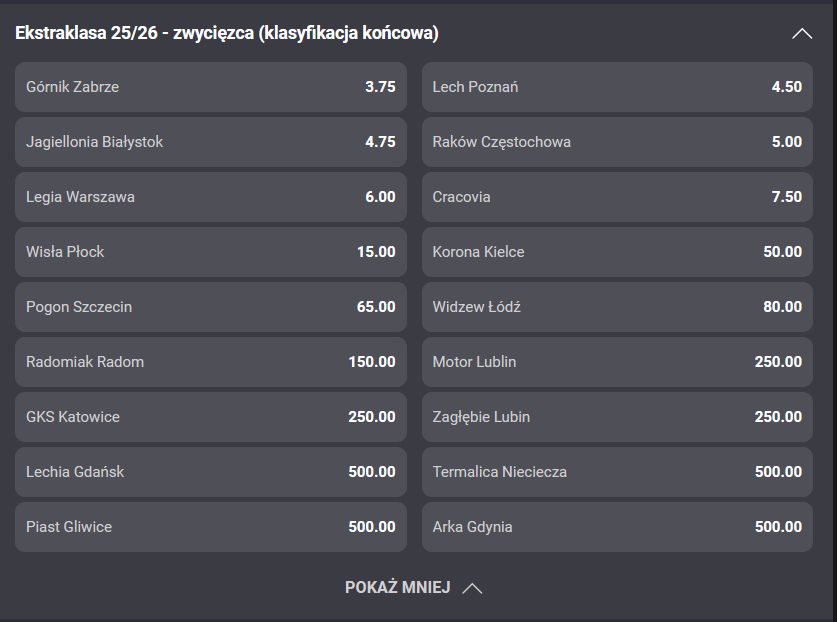

It seems that Górnik is somewhat underestimated.

In [29]:
round((3.75*0.88)/2.59, 2)

1.27

In [27]:
results = run_multiple_sims(league_id=106, season=2025, country_code_elo=None, country_code_api='POL', elo_date=ELO_DATE, number_of_sims=12500, number_of_winning_places=3, reverse=True, stdev=20, standings_df=standings_df)
results.head(20)

                 Club      Elo  Points  Games played
1       Gornik Zabrze  1545.04      29            14
2         Wisla Plock  1476.22      25            13
3         Jagiellonia  1560.58      24            13
4     Cracovia Krakow  1513.96      22            13
5         Lech Poznan  1551.70      21            13
6   Raków Częstochowa  1580.55      20            13
7       Korona Kielce  1485.10      20            14
8      Radomiak Radom  1454.03      19            14
9      Zaglebie Lubin  1447.37      18            13
10     Legia Warszawa  1529.50      17            13
11       GKS Katowice  1460.69      17            14
12     Pogon Szczecin  1498.42      17            14
13        Widzew Łódź  1425.17      17            14
14       Motor Lublin  1431.83      15            13
15        Arka Gdynia  1409.63      15            14
16      Lechia Gdansk  1418.51      10            14
17          Nieciecza  1376.34      10            14
18      Piast Gliwice  1436.27       8        

100%|██████████| 12500/12500 [01:40<00:00, 123.86it/s]

10275 simulations
3 winning places


,Club,Wins,% winrate,Expected odds
1,Nieciecza,8236,80.0,1.25
2,Lechia Gdansk,6292,61.0,1.63
3,Piast Gliwice,5993,58.0,1.71
4,Arka Gdynia,3358,33.0,3.06
5,Motor Lublin,2178,21.0,4.72
6,Widzew Łódź,1810,18.0,5.68
7,GKS Katowice,919,9.0,11.18
8,Zaglebie Lubin,725,7.0,14.17
9,Radomiak Radom,622,6.0,16.52
10,Pogon Szczecin,364,4.0,28.23


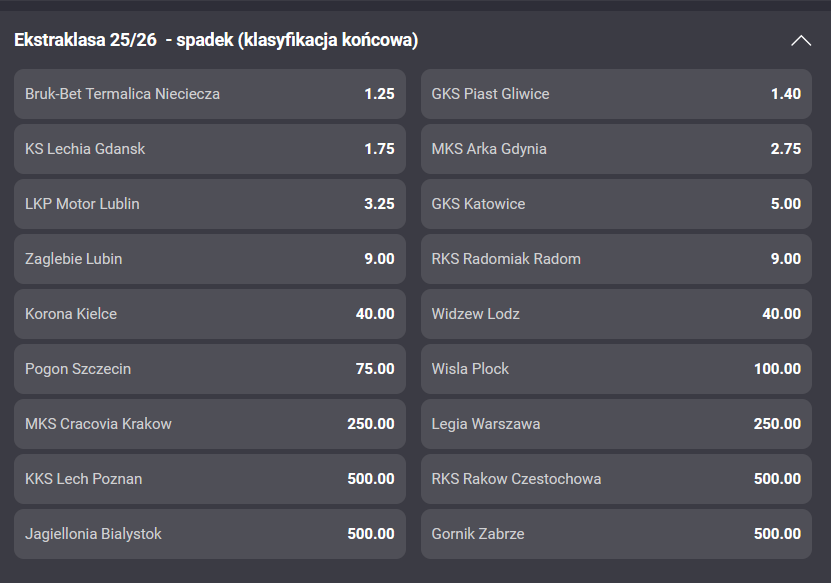

Apparently, the biggest potential lies in Widzew's relegation:

In [30]:
round((40*0.88)/5.68, 2)

6.2

with over 6-fold EV, an extremely high discrepancy between this model's and the bookie's predictions.

Pogoń and Legia are also quite unlikely longshots that may be slightly overestimated.

It's worth being noted, that data from Transfermarkt would suggest that Widzew is unlikely to be relegated with the team value's as seen below:

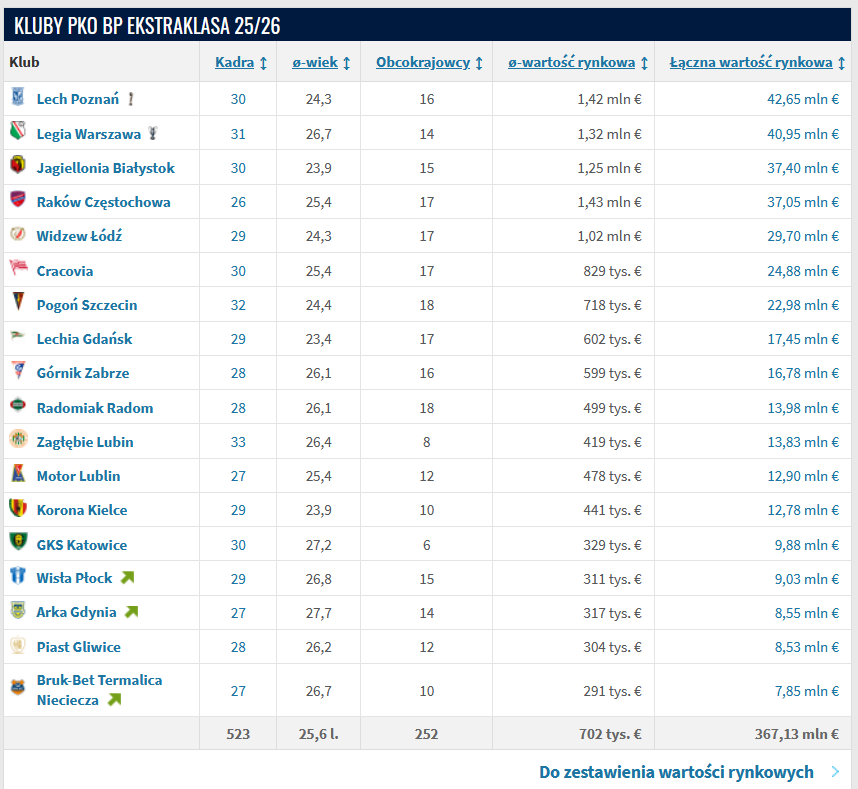